In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_parquet("/workspaces/MLops_learn/NYC_data/yellow_tripdata_2023-01.parquet")
print(f'The length of columns in January month is {len(df.columns)}')

The length of columns in January month is 19


In [3]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
std_value = df['duration'].describe()['std']
print(f'The standard deviation of the duration is {std_value}')

The standard deviation of the duration is 42.594351241920904


/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

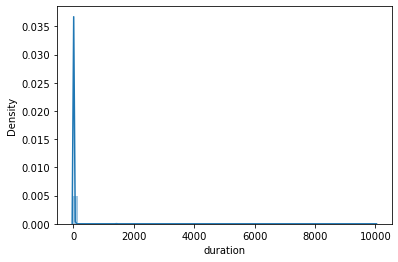

In [4]:
sns.distplot(df['duration'])

In [5]:
rows_before = df.shape[0]
df = df[(df.duration >= 1) & (df.duration <= 60)]
rows_after = df.shape[0]
fraction = (rows_after/rows_before)*100
print(f'The fraction of rows after filtering is {fraction:.0f}%')

The fraction of rows after filtering is 98%


In [6]:
categorical = ['PULocationID', 'DOLocationID']
#numerical = ['trip_distance']
df[categorical] = df[categorical].astype(str)
train_dicts = df[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
print(f'The number of columns is {X_train.shape[1]}')

The number of columns is 515


In [7]:
del df, train_dicts, dv, X_train, 

### Training and testing on validation data

In [8]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    return df

categorical = ['PULocationID', 'DOLocationID']
numerical = []
target = 'duration'
dv = DictVectorizer()
lr = LinearRegression()


In [9]:
df_train = read_dataframe('/workspaces/MLops_learn/NYC_data/yellow_tripdata_2023-01.parquet')
print(len(df_train))

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
y_train = df_train[target].values
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

rmse_train = mean_squared_error(y_train, y_pred, squared=False)
print(f'The RMSE of the training set is {rmse_train:.3f}')

3009173
The RMSE of the training set is 7.649


In [10]:
del df_train,X_train,y_train,train_dicts

In [11]:
df_val = read_dataframe('/workspaces/MLops_learn/NYC_data/yellow_tripdata_2023-02.parquet')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_val[target].values


y_pred = lr.predict(X_val)

rmse_train = mean_squared_error(y_val, y_pred, squared=False)
print(f'The RMSE of the validation set is {rmse_train:.3f}')

The RMSE of the validation set is 7.812
